In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('1995_96 - 2020 Premier league standings.csv')

In [5]:
df['GD'] = df['GF'] - df['GA']

,Rk,Squad,MP,W,D,L,GF,GA,Pts,Attendance,Top Team Scorer,Goalkeeper,Year,GD
0,1,Manchester Utd,38,25,7,6,73,35,82,41001,Eric Cantona - 14,Peter Schmeichel,1996,38
1,2,Newcastle Utd,38,24,6,8,66,37,78,36501,Les Ferdinand - 25,Shaka Hislop,1996,29
2,3,Liverpool,38,20,11,7,70,34,71,39553,Robbie Fowler - 28,David James,1996,36
3,4,Aston Villa,38,18,9,11,52,35,63,37492,Dwight Yorke - 17,Mark Bosnich,1996,17
4,5,Arsenal,38,17,12,9,49,32,63,32614,Ian Wright - 15,David Seaman,1996,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,16,West Ham,38,10,9,19,49,62,39,44155,Michail Antonio - 10,Łukasz Fabiański,2020,-13
496,17,Aston Villa,38,9,8,21,41,67,35,28505,Jack Grealish - 8,Tom Heaton,2020,-26
497,18,Bournemouth,38,9,7,22,40,65,34,7745,Callum Wilson - 8,Aaron Ramsdale,2020,-25
498,19,Watford,38,8,10,20,36,64,34,15353,Troy Deeney - 10,Ben Foster,2020,-28


In [10]:
y = df.Rk
x = df.GD.values.reshape(-1,1)

In [11]:
model = LinearRegression().fit(x,y)

In [14]:
r_sq = model.score(x, y)
intercept = model.intercept_
slope = model.coef_
y_pred = slope * x + intercept

Text(-65, 1.65, 'R-Squared = 0.84\nThe regression equation: y = 10.5 + [-0.21341188] * x ')

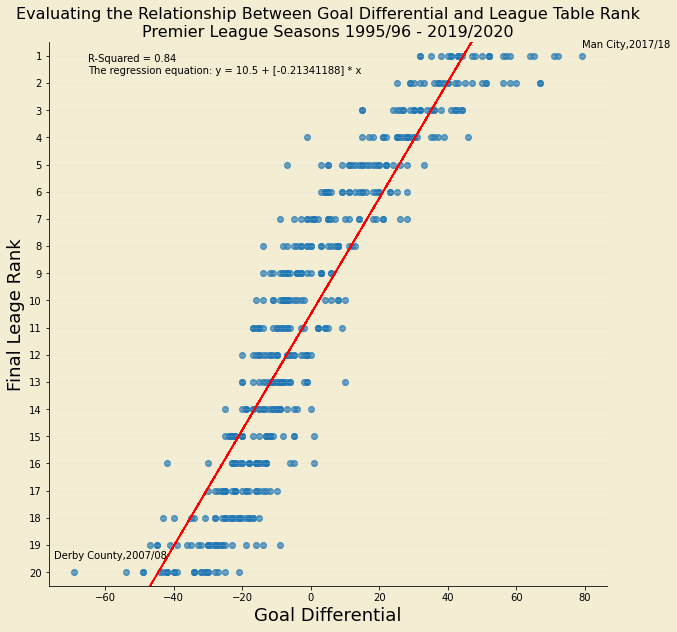

In [16]:
fig, ax = plt.subplots(figsize = (10, 10))
fig.set_facecolor('#f3edd3')
ax.patch.set_facecolor('#f3edd3')

ax.grid(ls='dotted',lw=.5,color='lightgrey',axis='y',zorder=1)
spines = ['top','right']
for i in spines:
        ax.spines[i].set_visible(False)

plt.scatter(x,y,alpha=.7)
plt.plot(x,y_pred,c='red',linestyle='--',dashes=(5,5))


plt.ylim(.5,20.5)
plt.gca().invert_yaxis()

plt.yticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

plt.xlabel('Goal Differential',fontsize=18)
plt.ylabel('Final Leage Rank',fontsize=18)
plt.title('Evaluating the Relationship Between Goal Differential and League Table Rank\nPremier League Seasons 1995/96 - 2019/2020',ha='center',fontsize=16)

ax.annotate(xy=(79,.7),text='Man City,2017/18')
ax.annotate(xy=(-75,19.5),text='Derby County,2007/08')

ax.annotate(xy=(-65,1.65),text=f'R-Squared = {round(r_sq,2)}\nThe regression equation: y = {intercept} + {slope} * x ')
